[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Total messages: 5572


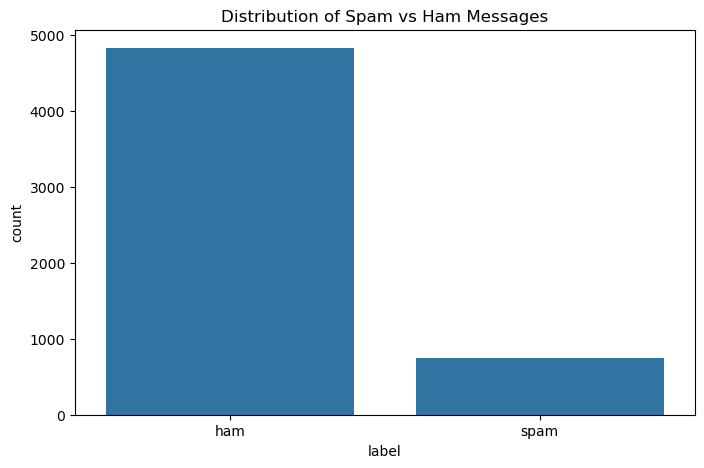

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['label', 'message']

# Explore the data
print(df.head())
print("\nLabel distribution:")
print(df['label'].value_counts())
print(f"\nTotal messages: {len(df)}")

# Visualize label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

In [15]:
import nltk
import os

# Remove proxy settings (if any)
os.environ["http_proxy"] = ""
os.environ["https_proxy"] = ""

# Now try downloading
nltk.download('punkt')
import nltk

# Replace with your actual proxy (e.g., 'http://proxy.example.com:8080')
PROXY = "http://your_proxy_address:port"  

# Set proxy for NLTK downloads
nltk.set_proxy(PROXY)
nltk.download('punkt')
import nltk
print(nltk.data.path)

['C:\\Users\\vishw/nltk_data', 'D:\\vishw\\New folder\\nltk_data', 'D:\\vishw\\New folder\\share\\nltk_data', 'D:\\vishw\\New folder\\lib\\nltk_data', 'C:\\Users\\vishw\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.model_selection import train_test_split

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize required tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = TreebankWordTokenizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = tokenizer.tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

# Example: Load your DataFrame here
# df = pd.read_csv('your_data.csv')  # Uncomment if you're loading from a file

# Apply preprocessing
df['processed_text'] = df['message'].apply(preprocess_text)

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['label'], test_size=0.2, random_state=42
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [30]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   0]
 [ 35 115]]
Accuracy: 0.9686


In [31]:
# Train Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluation
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[965   0]
 [ 24 126]]
Accuracy: 0.9785


In [32]:
# Train SVM model
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluation
print("\nSVM Classifier:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[962   3]
 [ 20 130]]
Accuracy: 0.9794


In [33]:
# Create final pipeline with the best performing model (Naive Bayes in this case)
final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, preprocessor=preprocess_text)),
    ('classifier', MultinomialNB())
])

# Train on the entire training data
final_pipeline.fit(X_train, y_train)

# Final evaluation on test set
y_pred_final = final_pipeline.predict(X_test)
print("\nFinal Model Evaluation:")
print(classification_report(y_test, y_pred_final))
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")


Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9677


In [34]:
import joblib

# Save the model
joblib.dump(final_pipeline, 'spam_classifier.pkl')

# Example of loading and using the model
loaded_model = joblib.load('spam_classifier.pkl')
example_message = "WINNER!! You've been selected for a free prize. Call now!"
prediction = loaded_model.predict([example_message])
print(f"\nExample prediction: {'spam' if prediction[0] == 1 else 'ham'}")


Example prediction: spam
